In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("marketing_campaign.xls",sep='\t')
data.Dt_Customer = pd.to_datetime(data.Dt_Customer,format="%d-%m-%Y")
data.insert(2,"Age",data.Dt_Customer.dt.year-data.Year_Birth)
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data = data.dropna()
data.insert(6,"Spent",data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,55,Graduation,Alone,58138.0,1617,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Alone,46344.0,27,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,48,Graduation,Partner,71613.0,776,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Partner,26646.0,53,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Partner,58293.0,422,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

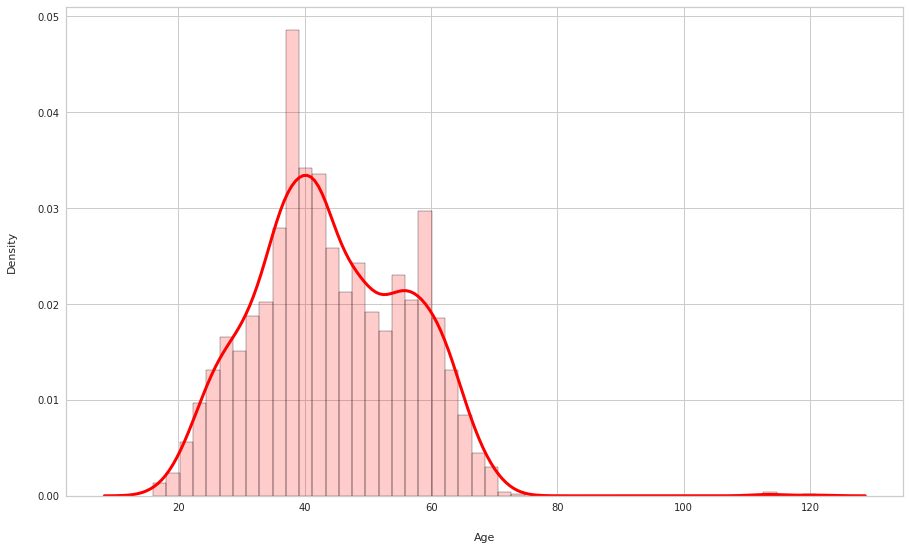

In [6]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    data.Age, 
    bins=50, 
    stat='density',
    alpha=0.2,
    color = "red"
)

density_curve = sns.kdeplot(data.Age, linewidth=3, color="red")

plt.xlabel("Age", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [7]:
data = data[data.Age < 100]

In [8]:
mean_age = data.Age.mean()
median_age = data.Age.median()
std_age = data.Age.std()
print("Media: " + str(mean_age))
print("Mediana: " + str(median_age))
print("Standard deviation: " + str(std_age))

Media: 44.110709444193404
Mediana: 43.0
Standard deviation: 11.736749987325991


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

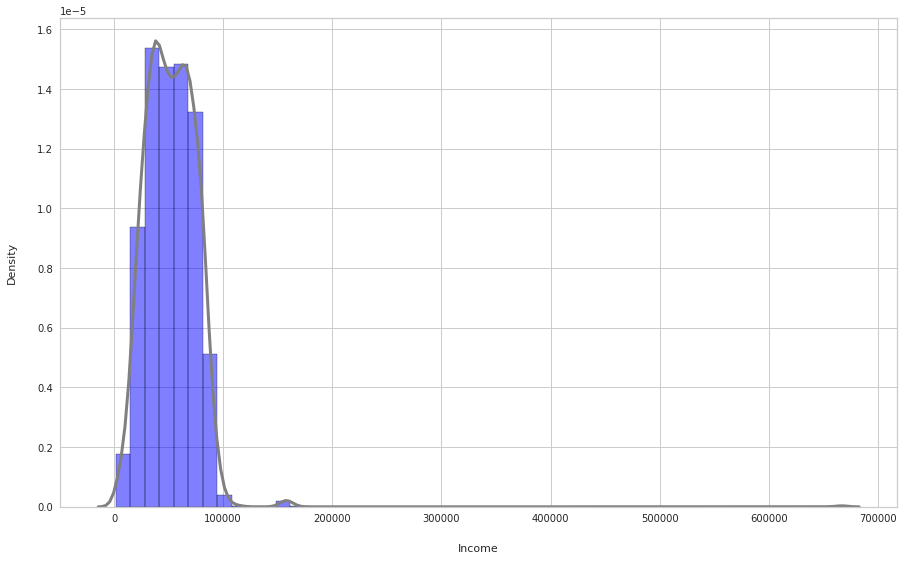

In [9]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    data.Income, 
    bins=50, 
    stat='density',
    alpha=0.5,
    color = "blue"
)

density_curve = sns.kdeplot(data.Income, linewidth=3, color="grey")

plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [10]:
data = data[data.Income < 600000]

In [11]:
mean_income = data.Income.mean()
median_income = data.Income.median()
std_income = data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 51958.81057866185
Mediana: 51371.0
Standard deviation: 21527.278844050485


In [12]:
counts_edu = data.Education.value_counts()
print(counts_edu)

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

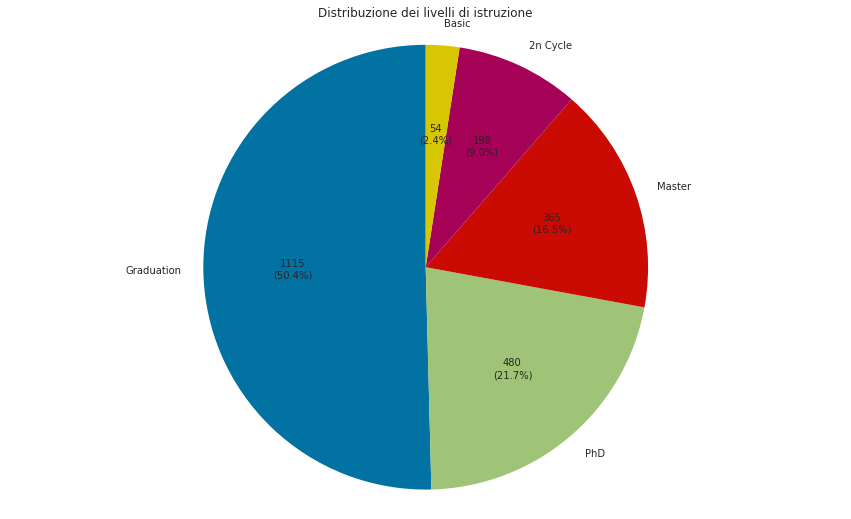

In [13]:
total = counts_edu.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_edu, labels=counts_edu.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione dei livelli di istruzione')
plt.show()

In [14]:
counts_status = data.Marital_Status.value_counts()
print(counts_status)

Marital_Status
Partner    1428
Alone       784
Name: count, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

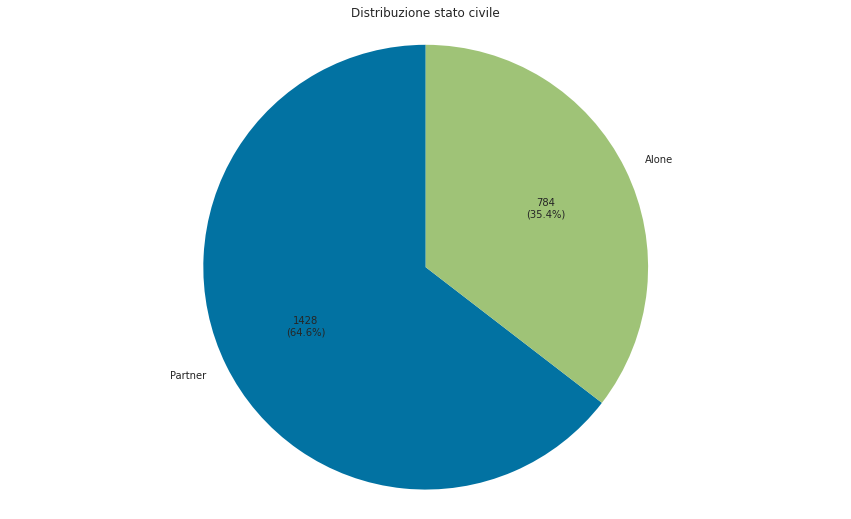

In [15]:
total = counts_status.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_status, labels=counts_status.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione stato civile')
plt.show()

In [16]:
counts_children = data.Kidhome.value_counts()
print(counts_children)

Kidhome
0    1281
1     885
2      46
Name: count, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

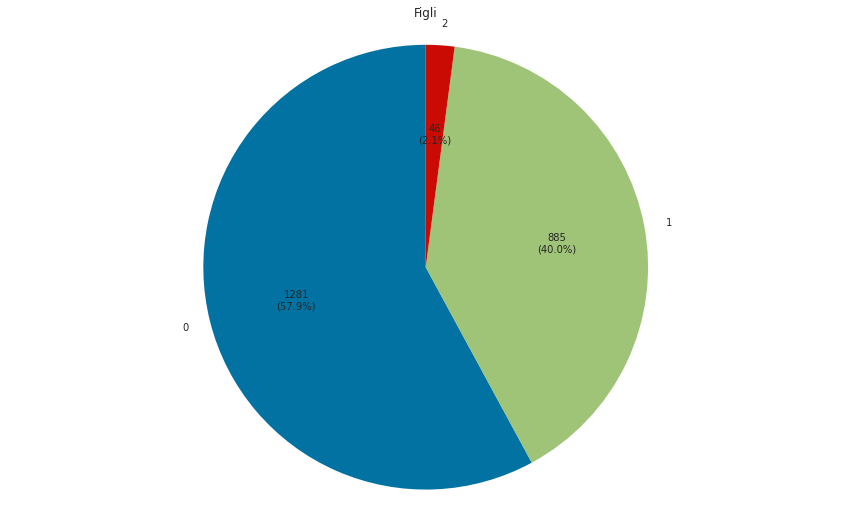

In [17]:
total = counts_children.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_children, labels=counts_children.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Figli')
plt.show()

In [18]:
counts_teen = data.Teenhome.value_counts()
print(counts_teen)

Teenhome
0    1144
1    1017
2      51
Name: count, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

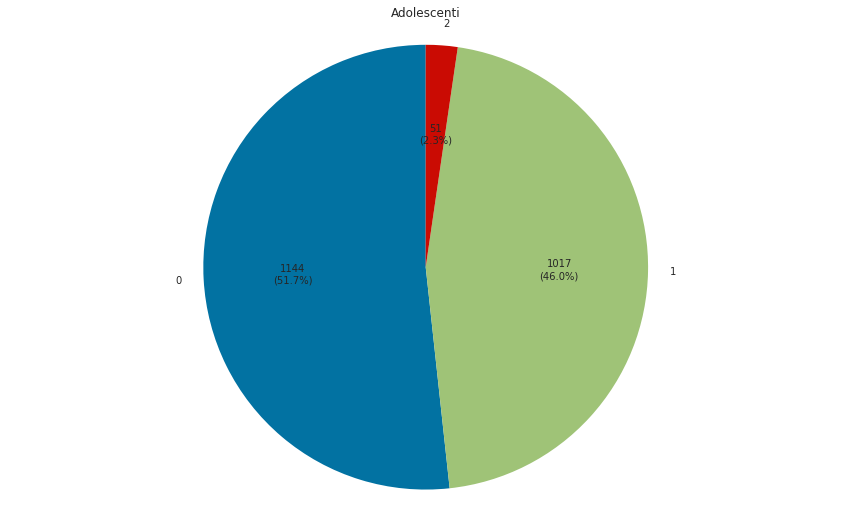

In [19]:
total = counts_teen.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_teen, labels=counts_teen.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Adolescenti')
plt.show()

In [20]:
data.insert(9,"Children",data["Kidhome"]+ data["Teenhome"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,55,Graduation,Alone,58138.0,1617,0,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Alone,46344.0,27,1,1,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,48,Graduation,Partner,71613.0,776,0,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Partner,26646.0,53,1,0,1,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Partner,58293.0,422,1,0,1,...,5,0,0,0,0,0,0,3,11,0


In [21]:
counts_figli = data.Children.value_counts()
print(counts_figli)

Children
1    1114
0     632
2     416
3      50
Name: count, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

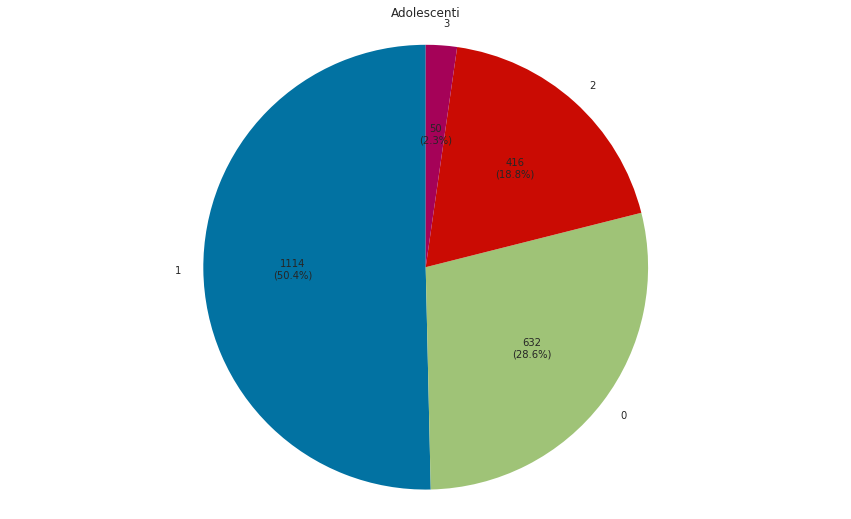

In [22]:
total = counts_figli.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_figli, labels=counts_figli.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Adolescenti')
plt.show()

In [23]:
phd_data = data.loc[data.Education== 'PhD']
phd_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,33,PhD,Partner,58293.0,422,1,0,1,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,28,PhD,Partner,33454.0,169,1,0,1,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,39,PhD,Partner,30351.0,46,1,0,1,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,64,PhD,Partner,5648.0,49,1,1,2,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,66,PhD,Alone,82800.0,1315,0,0,0,...,3,0,0,1,1,0,0,3,11,1


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

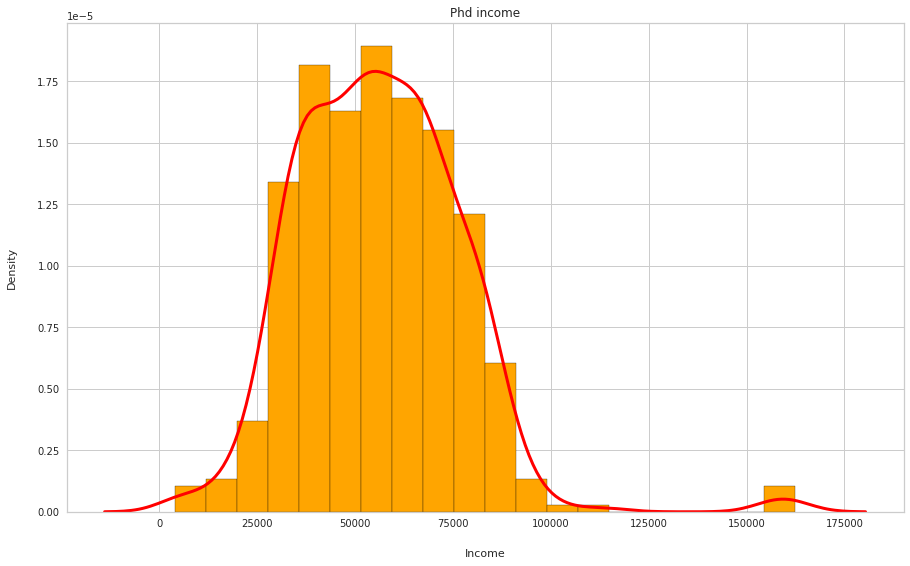

In [24]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    phd_data.Income, 
    bins=20, 
    stat='density',
    alpha=1,
    color = "orange"
)

density_curve = sns.kdeplot(phd_data.Income, linewidth=3, color="red")

plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.title("Phd income")
plt.show()

In [25]:
mean_income = phd_data.Income.mean()
median_income = phd_data.Income.median()
std_income = phd_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 56088.25833333333
Mediana: 55185.0
Standard deviation: 20596.42935560307


In [26]:
basic_data = data.loc[data.Education== 'Basic']
basic_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
11,387,1976,36,Basic,Partner,7500.0,61,0,0,0,...,8,0,0,0,0,0,0,3,11,0
105,8373,1979,34,Basic,Partner,24594.0,29,1,0,1,...,5,0,0,0,0,0,0,3,11,0
136,5342,1976,36,Basic,Alone,9548.0,29,1,0,1,...,8,0,0,0,0,0,0,3,11,0
184,2563,1961,53,Basic,Partner,28249.0,43,0,0,0,...,6,0,0,0,0,0,0,3,11,0
190,9733,1978,34,Basic,Partner,24882.0,80,1,0,1,...,6,1,0,0,0,0,0,3,11,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

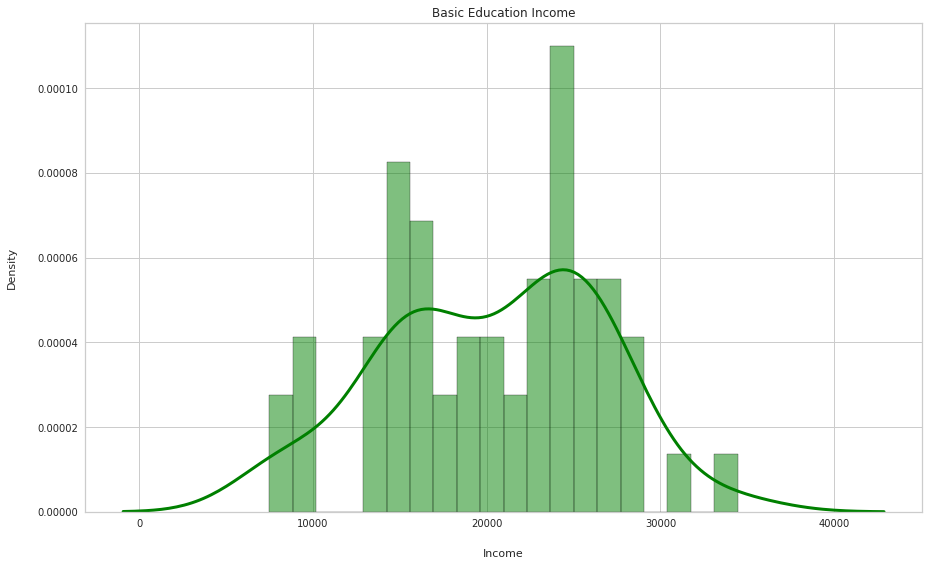

In [27]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    basic_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "green"
)

density_curve = sns.kdeplot(basic_data.Income, linewidth=3, color="green")

plt.title("Basic Education Income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [28]:
mean_income = basic_data.Income.mean()
median_income = basic_data.Income.median()
std_income = basic_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 20306.25925925926
Mediana: 20744.0
Standard deviation: 6235.066773288437


In [29]:
graduation_data = data.loc[data.Education== 'Graduation']
graduation_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,55,Graduation,Alone,58138.0,1617,0,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Alone,46344.0,27,1,1,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,48,Graduation,Partner,71613.0,776,0,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Partner,26646.0,53,1,0,1,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,41,Graduation,Alone,55635.0,590,0,1,1,...,6,0,0,0,0,0,0,3,11,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

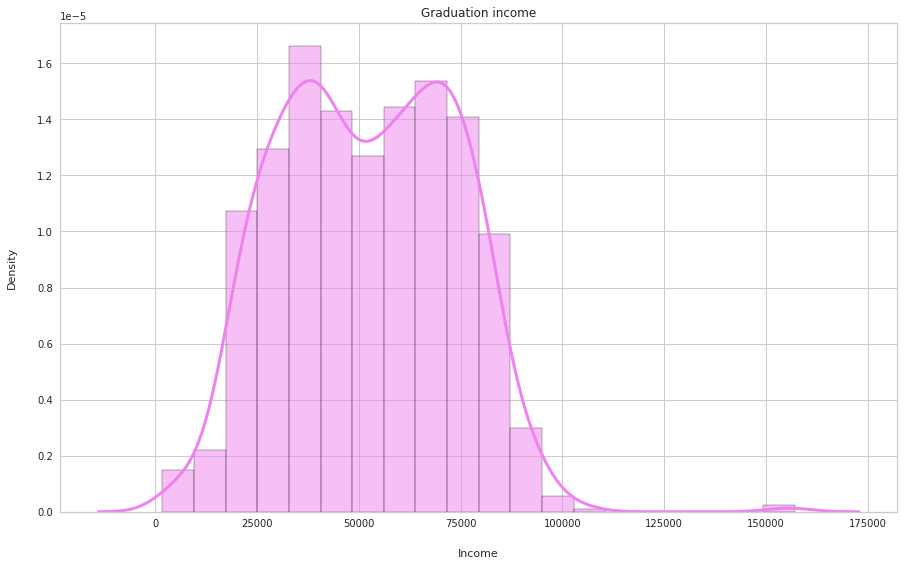

In [30]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    graduation_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "violet"
)

density_curve = sns.kdeplot(graduation_data.Income, linewidth=3, color="violet")

plt.title("Graduation income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [31]:
graduation_data = graduation_data[graduation_data.Income < 600000]

In [32]:
mean_income = graduation_data.Income.mean()
median_income = graduation_data.Income.median()
std_income = graduation_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52169.74977578475
Mediana: 51983.0
Standard deviation: 21354.316952362668


In [33]:
cycle_data = data.loc[data.Education== '2n Cycle']
cycle_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
19,2278,1985,27,2n Cycle,Alone,33812.0,133,1,0,1,...,6,0,0,0,0,0,0,3,11,0
37,10755,1976,37,2n Cycle,Partner,23718.0,81,1,0,1,...,7,0,0,0,0,0,0,3,11,0
46,9909,1996,16,2n Cycle,Partner,7500.0,122,0,0,0,...,9,0,0,0,0,0,0,3,11,1
67,9369,1979,35,2n Cycle,Alone,88194.0,1274,0,1,1,...,5,1,0,0,1,0,0,3,11,1
78,10401,1976,37,2n Cycle,Partner,26326.0,18,0,0,0,...,3,0,0,0,0,0,1,3,11,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

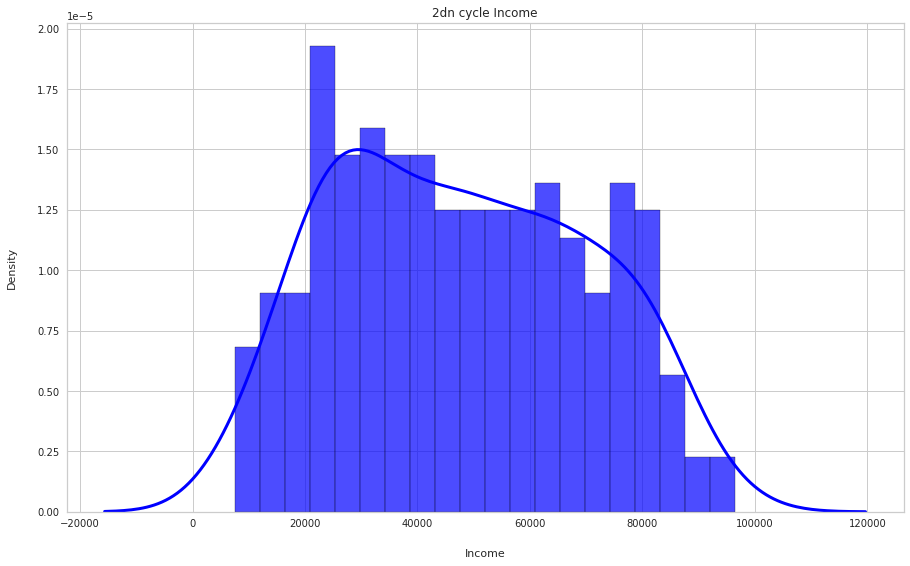

In [34]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    cycle_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.7,
    color = "blue"
)

density_curve = sns.kdeplot(cycle_data.Income, linewidth=3, color="blue")

plt.title("2dn cycle Income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [35]:
mean_income = cycle_data.Income.mean()
median_income = cycle_data.Income.median()
std_income = cycle_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 47625.333333333336
Mediana: 46805.0
Standard deviation: 22199.278285245826


In [36]:
master_data = data.loc[data.Education== 'Master']
master_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5,7446,1967,46,Master,Partner,62513.0,716,0,1,1,...,6,0,0,0,0,0,0,3,11,0
13,8180,1952,61,Master,Alone,59354.0,310,1,1,2,...,6,0,0,0,0,0,0,3,11,0
18,6565,1949,64,Master,Partner,76995.0,1782,0,1,1,...,5,0,0,0,1,0,0,3,11,0
30,6864,1989,25,Master,Alone,10979.0,30,0,0,0,...,5,0,0,0,0,0,0,3,11,0
31,3033,1963,50,Master,Partner,38620.0,318,0,0,0,...,3,0,0,0,0,0,0,3,11,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

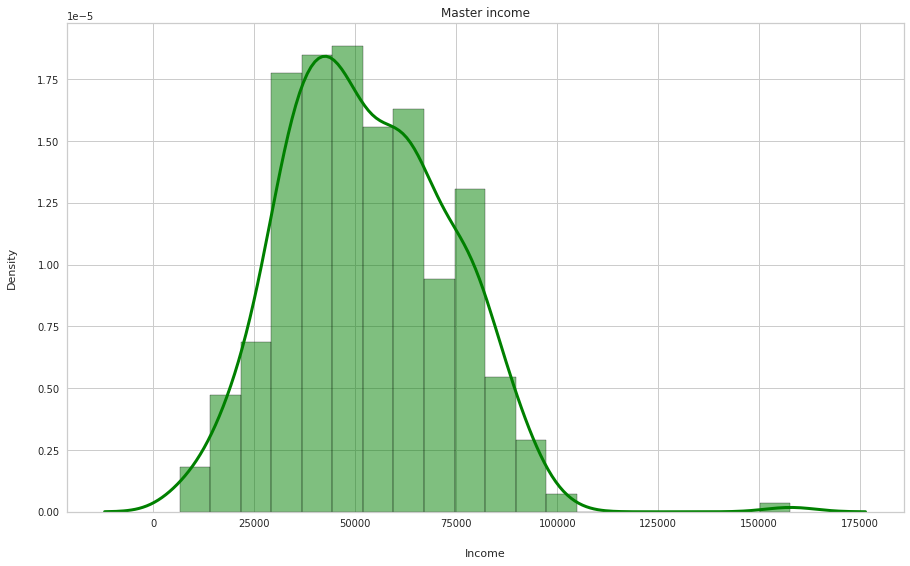

In [37]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    master_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "green"
)

density_curve = sns.kdeplot(master_data.Income, linewidth=3, color="green")

plt.title("Master income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [38]:
mean_income = master_data.Income.mean()
median_income = master_data.Income.median()
std_income = master_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52917.53424657534
Mediana: 50943.0
Standard deviation: 20157.78802913486


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

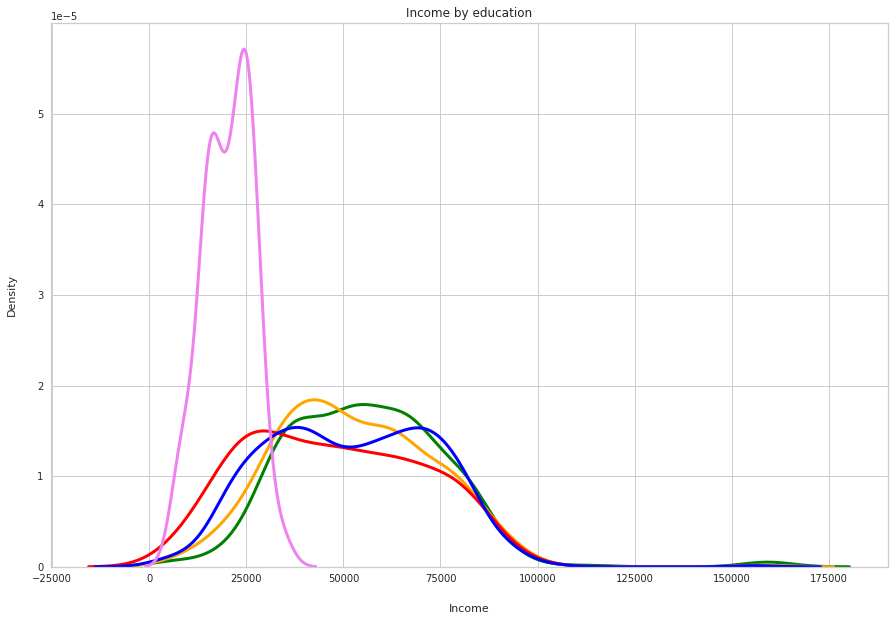

In [39]:
plt.figure(figsize=(15,10))

density_curve = sns.kdeplot(phd_data.Income, linewidth=3, color="green")
density_curve = sns.kdeplot(master_data.Income, linewidth=3, color="orange")
density_curve = sns.kdeplot(cycle_data.Income, linewidth=3, color="red")
density_curve = sns.kdeplot(graduation_data.Income, linewidth=3, color="blue")
density_curve = sns.kdeplot(basic_data.Income, linewidth=3, color="violet")

plt.title("Income by education")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

#ciao

In [40]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [41]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

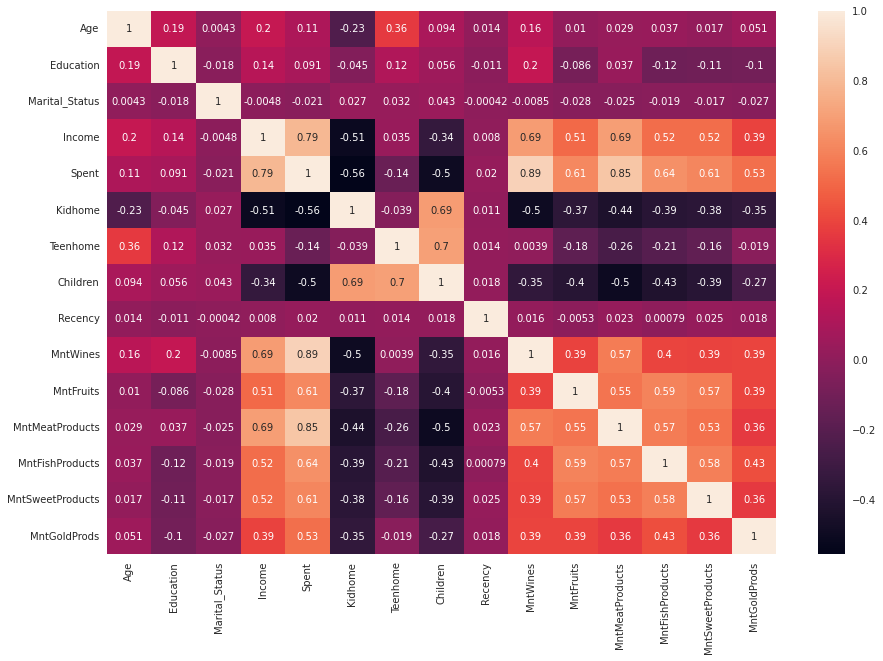

In [42]:
#heatmap per vedere correlazione tra gli attributi
data.drop(["ID","Year_Birth"],axis=1, inplace=True)
data.drop(data.iloc[:, 16:], inplace = True, axis = 1)
data=data.select_dtypes(include=['number'])
plt.figure(figsize=(15,10))
 
ax = sns.heatmap(data.corr(), annot=True)

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

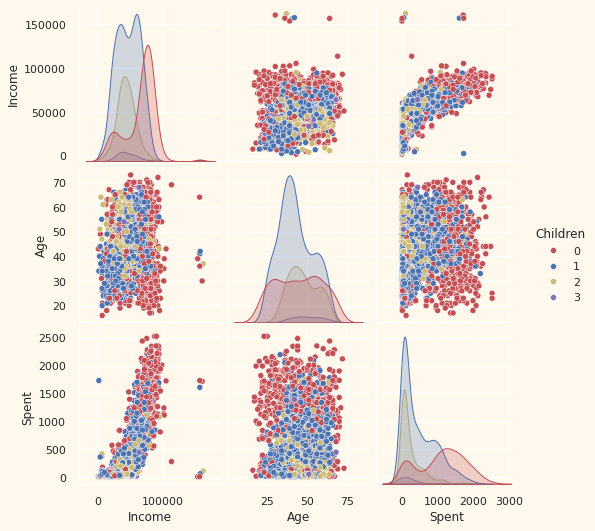

In [43]:
#grafico pairplot per vedere correlazione tra alcuni attributi e il numero dei figli dei clienti
sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Age", "Spent", "Children"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Children",palette= (["r","b","y","m"])) 
plt.show()

In [44]:
data = data.drop(["Teenhome","Kidhome"],axis=1)
data.head()

,Age,Education,Marital_Status,Income,Spent,Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,55,2,0,58138.0,1617,0,58,635,88,546,172,88,88
1,60,2,0,46344.0,27,2,38,11,1,6,2,1,6
2,48,2,1,71613.0,776,0,26,426,49,127,111,21,42
3,30,2,1,26646.0,53,1,26,11,4,20,10,3,5
4,33,4,1,58293.0,422,1,94,173,43,118,46,27,15


In [45]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns=data.columns)

In [46]:
#PCA per ridurre a 3 dimensioni
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,3.212219e-17,2.284213,-2.992615,-1.982562,-0.819210,1.769818,7.011782
col2,2212.0,1.766720e-17,1.201829,-3.573937,-0.833191,0.034539,0.805196,3.600294
col3,2212.0,1.606109e-17,1.006184,-2.314556,-0.759409,0.014984,0.673724,2.814867


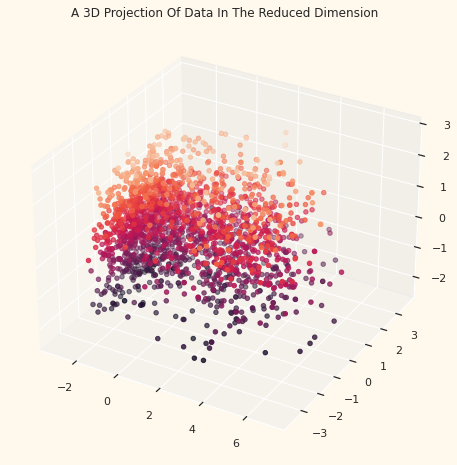

In [47]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o", c=z)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Clustering

Elbow Method to determine the number of clusters to be formed:


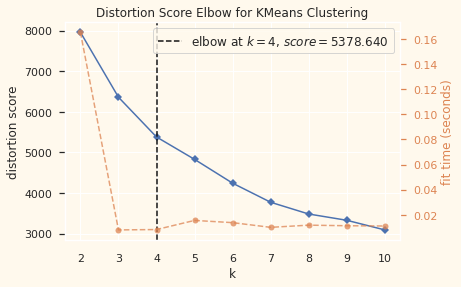

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
#numero di cluster da utilizzare usando il metodo a gomito con PCA
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


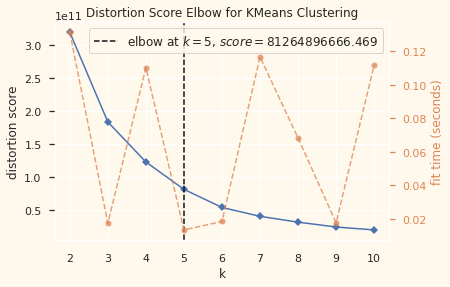

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
#senza pca
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

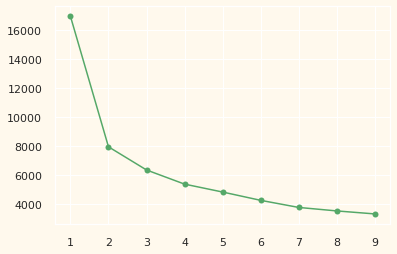

In [50]:
from sklearn.cluster import KMeans

ebw = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(PCA_ds)
    ebw.append(km.inertia_)

plt.plot(range(1,10),ebw,'g',marker='o')
plt.show()

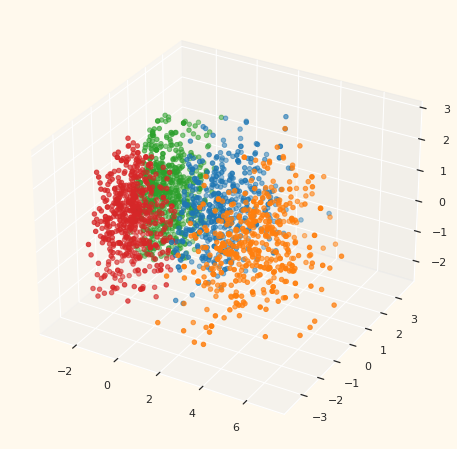

In [51]:
kmeans = KMeans(n_clusters=4,n_init=10,max_iter=300,random_state=0,tol=1e-04)
kmeans.fit(PCA_ds)
colormap = plt.get_cmap("tab10") 
cluster_colors = colormap(kmeans.labels_)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c=cluster_colors)
plt.show()

/home/aronds/.local/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


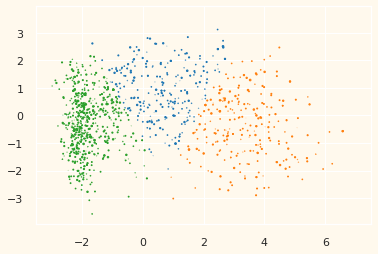

In [52]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(PCA_ds)
colormap = plt.get_cmap("tab10") 
cluster_colors = colormap(kmeans2.labels_)

plt.scatter(x,y,z,c=cluster_colors)
plt.show()

In [53]:
kmeans3 = KMeans(n_clusters=3,n_init=10,max_iter=300,random_state=0,tol=1e-04)
kmeans3.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=0)

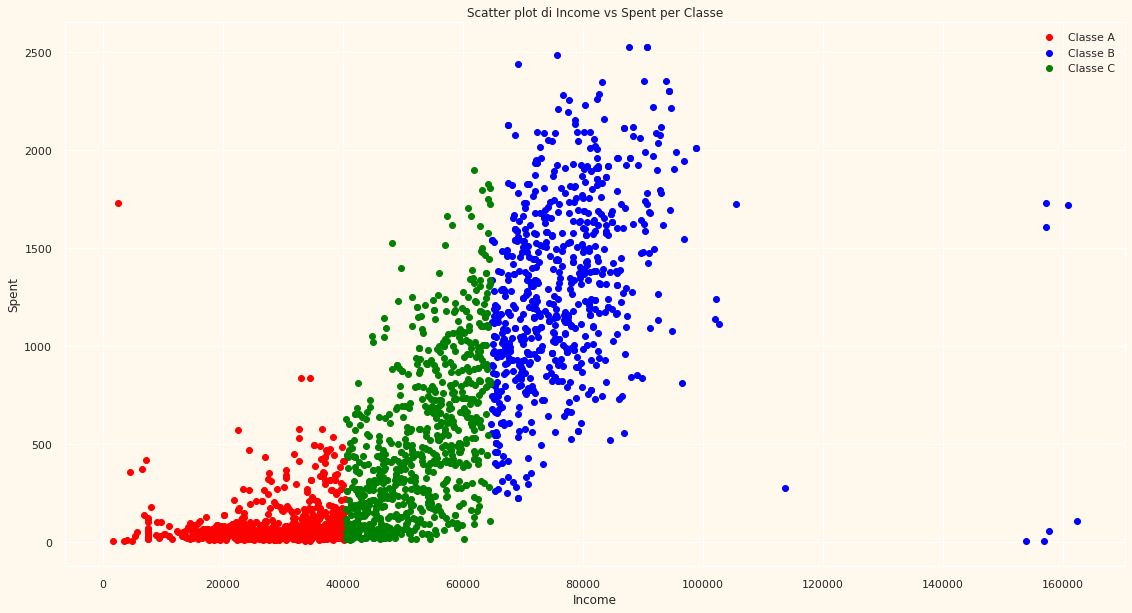

In [54]:
newData = data
newData["Class"] = kmeans3.labels_

newData0 = newData.loc[newData.Class== 0]
newData1 = newData.loc[newData.Class== 1]
newData2 = newData.loc[newData.Class== 2]

plt.figure(figsize=(19,10))

# Grafico
plt.scatter(newData0.Income, newData0.Spent, color='red', label='Classe A')
plt.scatter(newData1.Income, newData1.Spent, color='blue', label='Classe B')
plt.scatter(newData2.Income, newData2.Spent, color='green', label='Classe C')

# Etichette e titoli
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Scatter plot di Income vs Spent per Classe')
plt.legend()

The average silhouette_score is : 0.5404965821364612


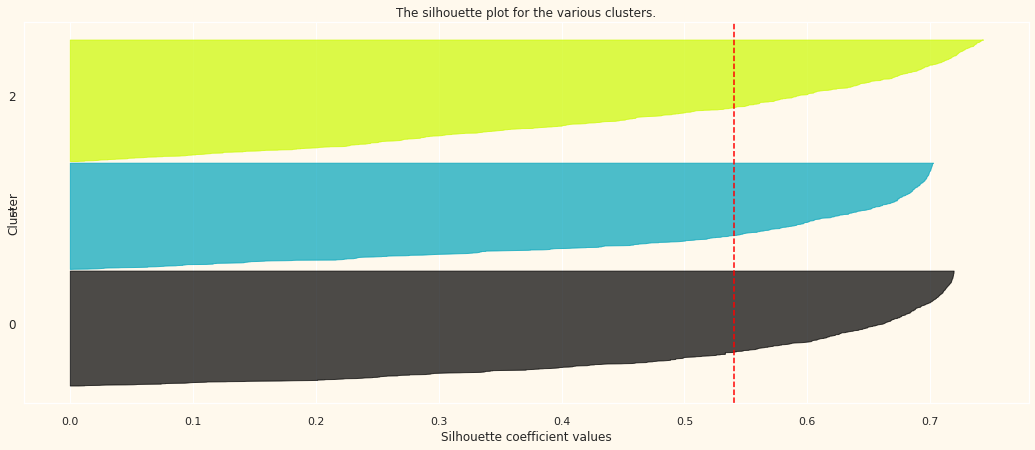

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

X = data  # Usa il tuo dataset originale senza la colonna dei cluster
labels = kmeans3.labels_

# Calcolare il punteggio della silhouette
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Calcolare i valori di silhouette per ogni campione
sample_silhouette_values = silhouette_samples(X, labels)

y_lower = 10
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# Etichetta sull'asse y
ax1.set_yticks([])
ax1.set_yticklabels([])
ax1.set_ylabel("Cluster")

# Etichetta sull'asse x
ax1.set_xlabel("Silhouette coefficient values")

# Punti verticali che indicano l'average silhouette score
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Colori per i 3 cluster
colors = cm.nipy_spectral(labels.astype(float) / 3)

for i in range(3):
    # Aggregare i valori della silhouette per ogni cluster
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Etichetta del cluster
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcolare la nuova y_lower per il prossimo plot
    y_lower = y_upper + 10  # 10 per lo spazio bianco tra i plot

plt.title("The silhouette plot for the various clusters.")
plt.show()


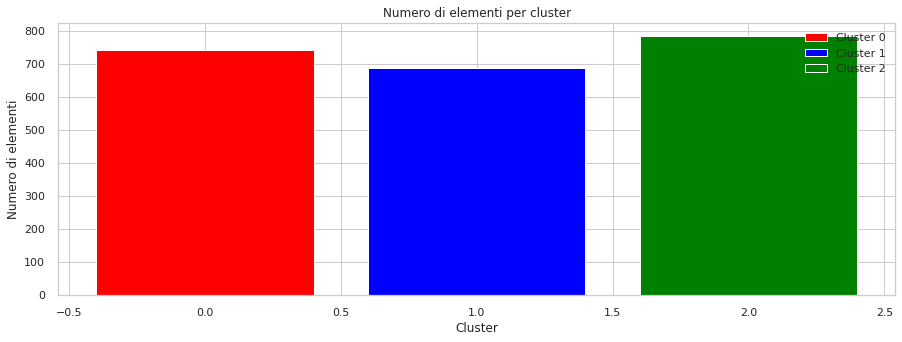

In [56]:
# Definizione dei colori per i cluster
cluster_colors = ['red', 'blue', 'green']

# Impostare lo stile di seaborn
sns.set_theme(style="whitegrid")

# Creazione del grafico a barre con mappa di colori
plt.figure(figsize=(15, 5))

# Iterazione attraverso i cluster
for cluster in range(3):
    # Seleziona le righe corrispondenti a questo cluster
    cluster_data = newData[newData['Class'] == cluster]
    # Calcola il numero di righe per questo cluster
    count = cluster_data.shape[0]
    # Traccia una barra per questo cluster con il colore corrispondente
    plt.bar(cluster, count, color=cluster_colors[cluster], label=f'Cluster {cluster}')

# Etichette degli assi
plt.xlabel('Cluster')
plt.ylabel('Numero di elementi')
plt.title('Numero di elementi per cluster')
# Aggiungi la legenda
plt.legend()
# Mostra il grafico
plt.show()



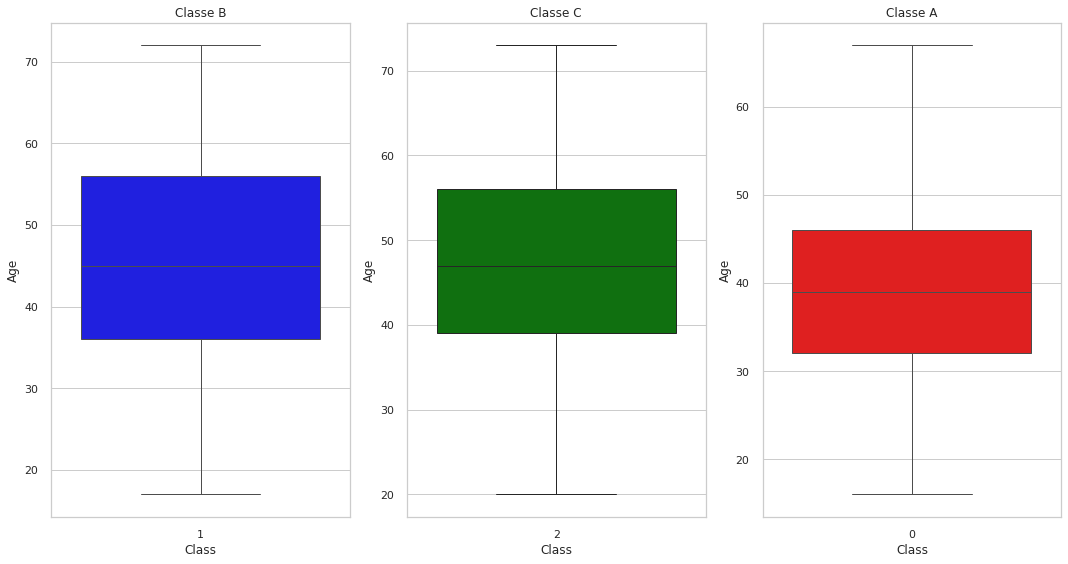

In [57]:
sns.set_theme(style="whitegrid")

# Creazione dei boxplot
plt.figure(figsize=(15, 8))

# Boxplot per la classe 0
plt.subplot(1, 3, 3)
sns.boxplot(x="Class", y="Age", data=newData0, color="red")
plt.title('Classe A')

# Boxplot per la classe 1
plt.subplot(1, 3, 1)
sns.boxplot(x="Class", y="Age", data=newData1, color="blue")
plt.title('Classe B')

# Boxplot per la classe 2
plt.subplot(1, 3, 2)
sns.boxplot(x="Class", y="Age", data=newData2, color="green")
plt.title('Classe C')

# Mostra i boxplot
plt.tight_layout()
plt.show()




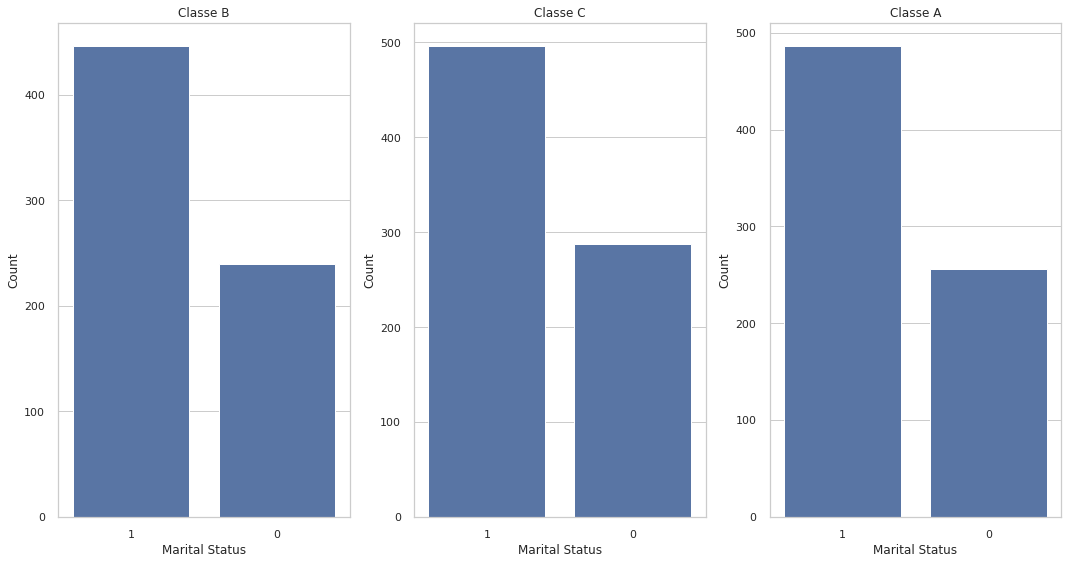

In [58]:
sns.set(style="whitegrid")

# Creazione dei countplot
plt.figure(figsize=(15, 8))

# Countplot per la classe 0
plt.subplot(1, 3, 3)
sns.countplot(x="Marital_Status", data=newData0, order=newData0["Marital_Status"].value_counts().index)
plt.title('Classe A')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Countplot per la classe 1
plt.subplot(1, 3, 1)
sns.countplot(x="Marital_Status", data=newData1, order=newData1["Marital_Status"].value_counts().index)
plt.title('Classe B')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Countplot per la classe 2
plt.subplot(1, 3, 2)
sns.countplot(x="Marital_Status", data=newData2, order=newData2["Marital_Status"].value_counts().index)
plt.title('Classe C')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Mostra i countplot
plt.tight_layout()
plt.show()


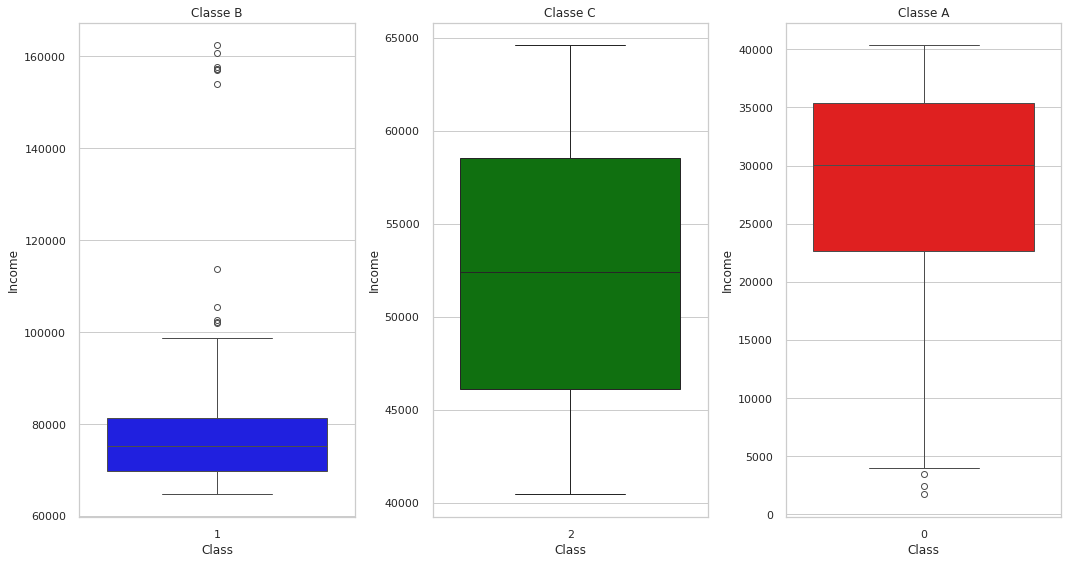

In [59]:
# Creazione dei boxplot
plt.figure(figsize=(15, 8))

# Boxplot per la classe 0
plt.subplot(1, 3, 3)
sns.boxplot(x="Class", y="Income", data=newData0, color='red')
plt.title('Classe A')

# Boxplot per la classe 1
plt.subplot(1, 3, 1)
sns.boxplot(x="Class", y="Income", data=newData1, color='blue')
plt.title('Classe B')

# Boxplot per la classe 2
plt.subplot(1, 3, 2)
sns.boxplot(x="Class", y="Income", data=newData2, color='green')
plt.title('Classe C')

# Mostra i boxplot
plt.tight_layout()
plt.show()

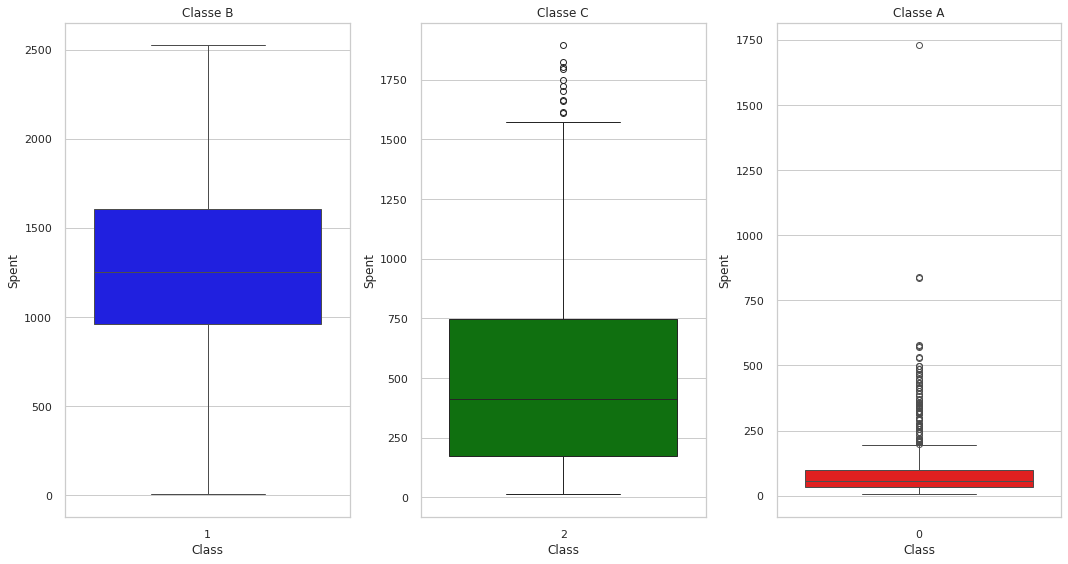

In [60]:
sns.set_theme(style="whitegrid")

# Creazione dei boxplot
plt.figure(figsize=(15, 8))

# Boxplot per la classe 0
plt.subplot(1, 3, 3)
sns.boxplot(x="Class", y="Spent", data=newData0, color='red')
plt.title('Classe A')

# Boxplot per la classe 1
plt.subplot(1, 3, 1)
sns.boxplot(x="Class", y="Spent", data=newData1, color='blue')
plt.title('Classe B')

# Boxplot per la classe 2
plt.subplot(1, 3, 2)
sns.boxplot(x="Class", y="Spent", data=newData2, color='green')
plt.title('Classe C')

# Mostra i boxplot
plt.tight_layout()
plt.show()


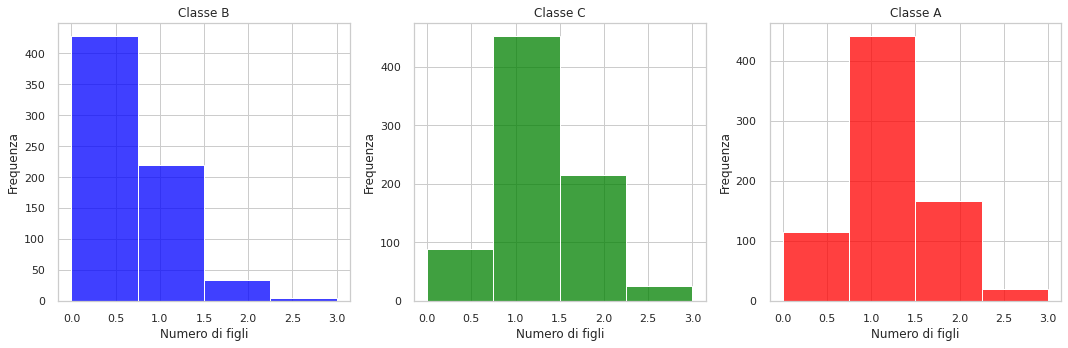

In [61]:
sns.set(style="whitegrid")

# Creazione dei subplot per gli istogrammi
plt.figure(figsize=(15, 5))

# Istogramma per la classe 0
plt.subplot(1, 3, 3)
sns.histplot(newData0["Children"], bins=4, color='red')
plt.title('Classe A')
plt.xlabel('Numero di figli')
plt.ylabel('Frequenza')

# Istogramma per la classe 1
plt.subplot(1, 3, 1)
sns.histplot(newData1["Children"], bins=4, color='blue')
plt.title('Classe B')
plt.xlabel('Numero di figli')
plt.ylabel('Frequenza')

# Istogramma per la classe 2
plt.subplot(1, 3, 2)
sns.histplot(newData2["Children"], bins=4, color='green')
plt.title('Classe C')
plt.xlabel('Numero di figli')
plt.ylabel('Frequenza')

# Mostra gli istogrammi
plt.tight_layout()
plt.show()


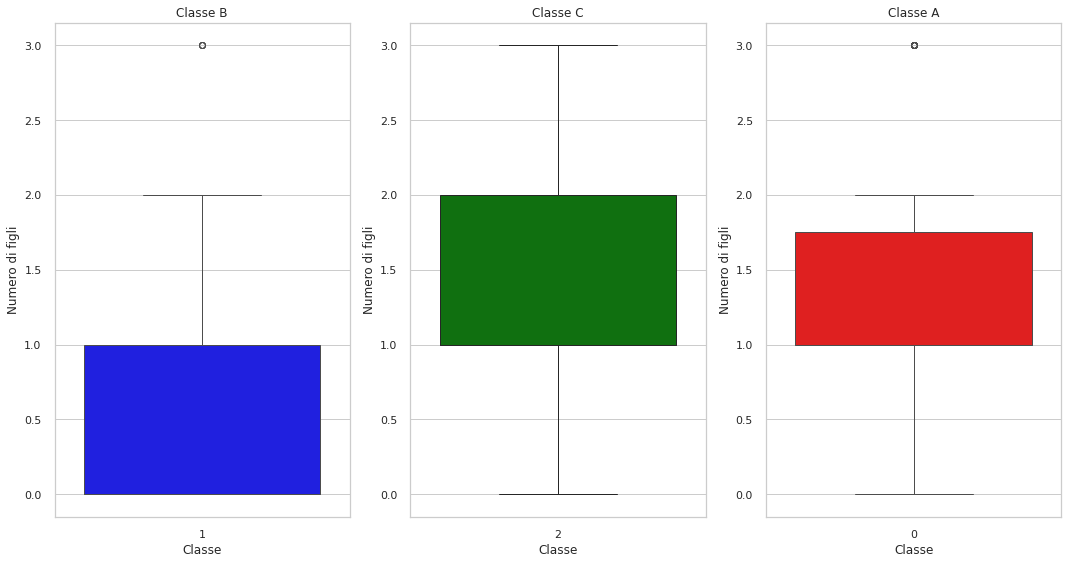

In [62]:
sns.set_theme(style="whitegrid")

# Creazione dei boxplot
plt.figure(figsize=(15, 8))

# Boxplot per la classe 0
plt.subplot(1, 3, 3)
sns.boxplot(x="Class", y="Children", data=newData0, color='red')
plt.title('Classe A')
plt.xlabel('Classe')
plt.ylabel('Numero di figli')

# Boxplot per la classe 1
plt.subplot(1, 3, 1)
sns.boxplot(x="Class", y="Children", data=newData1, color='blue')
plt.title('Classe B')
plt.xlabel('Classe')
plt.ylabel('Numero di figli')

# Boxplot per la classe 2
plt.subplot(1, 3, 2)
sns.boxplot(x="Class", y="Children", data=newData2, color='green')
plt.title('Classe C')
plt.xlabel('Classe')
plt.ylabel('Numero di figli')

plt.tight_layout()
plt.show()

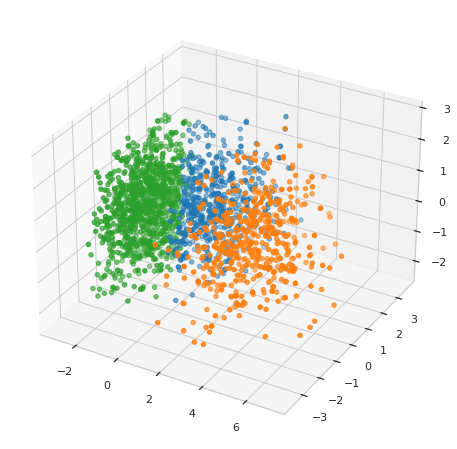

In [63]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
colormap = plt.get_cmap("tab10") 
cluster_colors = colormap(kmeans2.labels_)
ax.scatter(x,y,z,c=cluster_colors)
plt.show()

In [64]:
kmeans.labels_

array([1, 2, 0, ..., 0, 0, 2], dtype=int32)

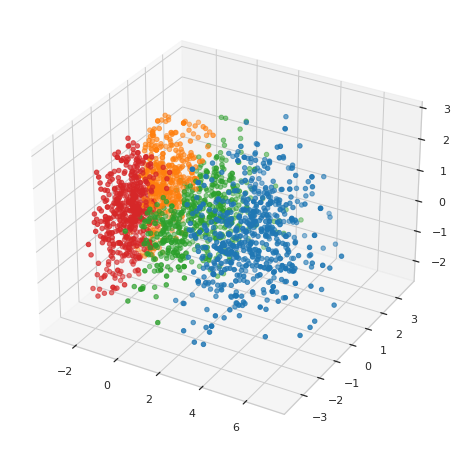

In [65]:
ac = AgglomerativeClustering(n_clusters=4)
predictions = ac.fit_predict(PCA_ds)
colormap = plt.get_cmap("tab10") 
cluster_colors = colormap(predictions)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c=cluster_colors,marker='o')
plt.show()

In [66]:
ac2 = AgglomerativeClustering(n_clusters=5)
ac2.fit(data)

AgglomerativeClustering(n_clusters=5)

In [67]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette = silhouette_score(PCA_ds, kmeans.labels_)
db_index = davies_bouldin_score(PCA_ds, kmeans.labels_)
ch_index = calinski_harabasz_score(PCA_ds, kmeans.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.26
Davies-Bouldin Index: 1.27
Calinski-Harabasz Index: 1586.38


In [68]:
silhouette = silhouette_score(data, kmeans3.labels_)
db_index = davies_bouldin_score(data, kmeans3.labels_)
ch_index = calinski_harabasz_score(data, kmeans3.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.54
Davies-Bouldin Index: 0.55
Calinski-Harabasz Index: 5075.77


In [69]:
unique, counts = np.unique(kmeans3.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 742, 1: 686, 2: 784}

In [70]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data,
                                                          kmeans3.labels_,
                                                          test_size=0.30,
                                                          random_state=42)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train, train_labels)
pred_y = classifier.predict(test)
cm = confusion_matrix(test_labels,pred_y)
accuracy_score(test_labels,pred_y)

1.0

<Axes: >

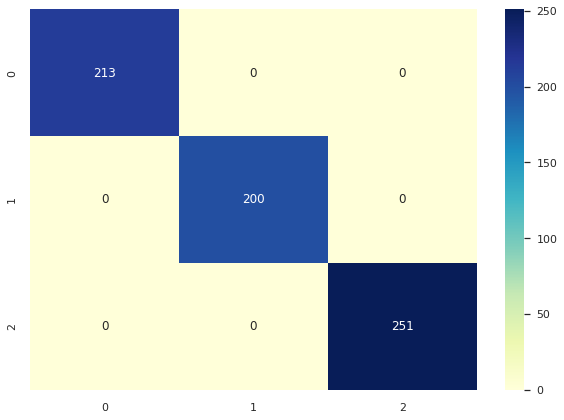

In [72]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='g',cmap="YlGnBu")

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, data, predictions, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Accuracy: 0.710 (0.038)


/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [74]:
print(scores)

[0.76126126 0.64864865 0.67873303 0.71040724 0.68778281 0.68325792
 0.76470588 0.73755656 0.67873303 0.74660633]


In [75]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, data, predictions, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.845 (0.018)


In [76]:
print(scores)

[0.84684685 0.81081081 0.85972851 0.84162896 0.84162896 0.84615385
 0.84162896 0.86425339 0.82352941 0.87782805]


In [77]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, train, train_labels,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LogisticRegression 0.7603359173126615
SVC 0.9896640826873385
LinearSVC 0.5594315245478036
KNeighbors 0.9967700258397932
DecisionTree 1.0
RandomForest 1.0
RandomForest2 1.0
MLPClassifier 0.313953488372093


/home/aronds/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aronds/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aronds/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH

In [78]:
model_name, model = models[4]
model.fit(train,train_labels)
pred_y = model.predict(test)
cm = confusion_matrix(test_labels,pred_y)
accuracy_score(test_labels,pred_y)

1.0

/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression: 0.75
Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       213
           1       0.81      0.81      0.81       200
           2       0.72      0.62      0.67       251

    accuracy                           0.75       664
   macro avg       0.76      0.76      0.76       664
weighted avg       0.75      0.75      0.75       664



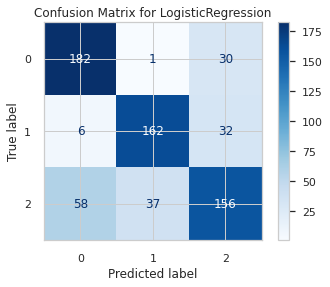

Accuracy of SVC: 0.99
Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       213
           1       1.00      1.00      1.00       200
           2       1.00      0.98      0.99       251

    accuracy                           0.99       664
   macro avg       0.99      0.99      0.99       664
weighted avg       0.99      0.99      0.99       664



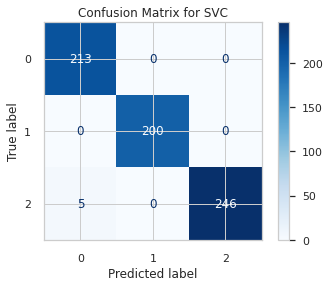

/home/aronds/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/aronds/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/aronds/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aronds/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Accuracy of LinearSVC: 0.59
Classification Report for LinearSVC:

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       213
           1       0.52      0.99      0.69       200
           2       0.00      0.00      0.00       251

    accuracy                           0.59       664
   macro avg       0.40      0.64      0.49       664
weighted avg       0.38      0.59      0.46       664



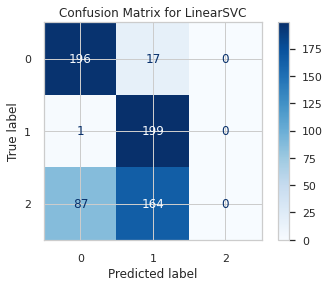

Accuracy of KNeighbors: 1.00
Classification Report for KNeighbors:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       213
           1       1.00      1.00      1.00       200
           2       1.00      0.99      0.99       251

    accuracy                           1.00       664
   macro avg       1.00      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664



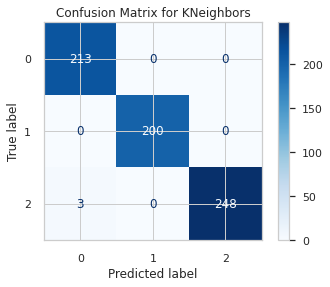

Accuracy of DecisionTree: 1.00
Classification Report for DecisionTree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       251

    accuracy                           1.00       664
   macro avg       1.00      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664



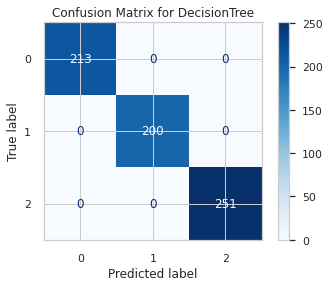

Accuracy of RandomForest: 1.00
Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       251

    accuracy                           1.00       664
   macro avg       1.00      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664



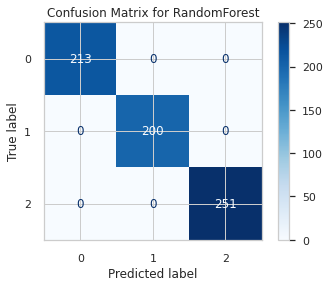

Accuracy of RandomForest2: 1.00
Classification Report for RandomForest2:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       251

    accuracy                           1.00       664
   macro avg       1.00      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664



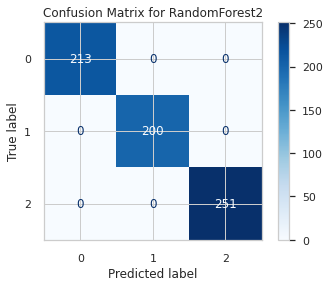

/home/aronds/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aronds/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aronds/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

Accuracy of MLPClassifier: 0.30
Classification Report for MLPClassifier:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       213
           1       0.30      1.00      0.46       200
           2       0.00      0.00      0.00       251

    accuracy                           0.30       664
   macro avg       0.10      0.33      0.15       664
weighted avg       0.09      0.30      0.14       664



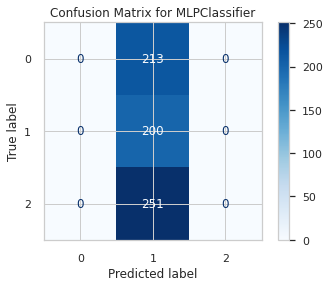

In [79]:
for model_name, model in models:
    # Adattare il modello
    model.fit(train, train_labels)
    pred_y = model.predict(test)

    # Calcolare la matrice di confusione e l'accuratezza
    cm = confusion_matrix(test_labels, pred_y)
    accuracy = accuracy_score(test_labels, pred_y)

    # Stampare l'accuratezza
    print(f"Accuracy of {model_name}: {accuracy:.2f}")

    # Stampare il report di classificazione
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(test_labels, pred_y))

    # Visualizzare la matrice di confusione
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()